In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
net = cv2.dnn.readNet("yolov4.weights","yolov4.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
print(output_layers)

['yolo_139', 'yolo_150', 'yolo_161']


In [10]:
classes = [line.strip() for line in open("coco.names")]

print("標籤名稱：", classes)

標籤名稱： ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [21]:
import random
colors = []
for i in range(len(classes)):
    colors.append((int(random.uniform(0, 255)),int(random.uniform(0, 255)),int(random.uniform(0, 255))))
                       
print(colors)

[(176, 223, 211), (160, 51, 94), (61, 201, 189), (19, 1, 248), (161, 9, 183), (125, 79, 1), (0, 215, 42), (161, 104, 56), (9, 180, 77), (206, 102, 231), (157, 90, 39), (163, 236, 254), (182, 98, 79), (199, 178, 143), (182, 125, 95), (88, 169, 218), (94, 251, 157), (194, 132, 185), (2, 86, 253), (44, 175, 148), (237, 139, 70), (191, 113, 215), (186, 183, 47), (107, 102, 179), (245, 7, 233), (94, 201, 229), (48, 252, 241), (5, 115, 145), (135, 221, 155), (137, 143, 209), (58, 136, 37), (241, 104, 190), (43, 208, 79), (108, 119, 207), (64, 253, 1), (115, 155, 146), (209, 169, 167), (198, 215, 97), (196, 77, 86), (35, 103, 108), (105, 10, 106), (178, 237, 78), (126, 157, 145), (226, 229, 204), (187, 164, 230), (106, 231, 84), (237, 91, 15), (113, 236, 231), (66, 127, 43), (212, 7, 90), (29, 35, 48), (220, 81, 104), (7, 29, 54), (201, 49, 80), (233, 179, 227), (208, 202, 127), (212, 155, 125), (24, 213, 51), (144, 120, 90), (44, 247, 53), (93, 167, 4), (175, 77, 209), (116, 137, 76), (139, 

In [22]:
def yolo_detect(img):
    height, width, channels = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255.0, (608, 608), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)
    
    boxes = []
    confidences = []
    class_ids = []
    
    for out in outs:
        for detection in out:
            tx, ty, tw, th, confidence = detection[0:5]
            scores = detection[5:]
            class_id = np.argmax(scores)
            if confidence>0.5:
                center_x = int(tx*width)
                center_y = int(ty*height)
                w = int(tw*width)
                h = int(th*height)
                x = int(center_x-w/2)
                y = int(center_y-h/2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
    
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            cv2.rectangle(img, (x, y), (x+w, y+h), colors[class_ids[i]], 2)
            cv2.putText(img, label, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[class_ids[i]], 1)
    return img

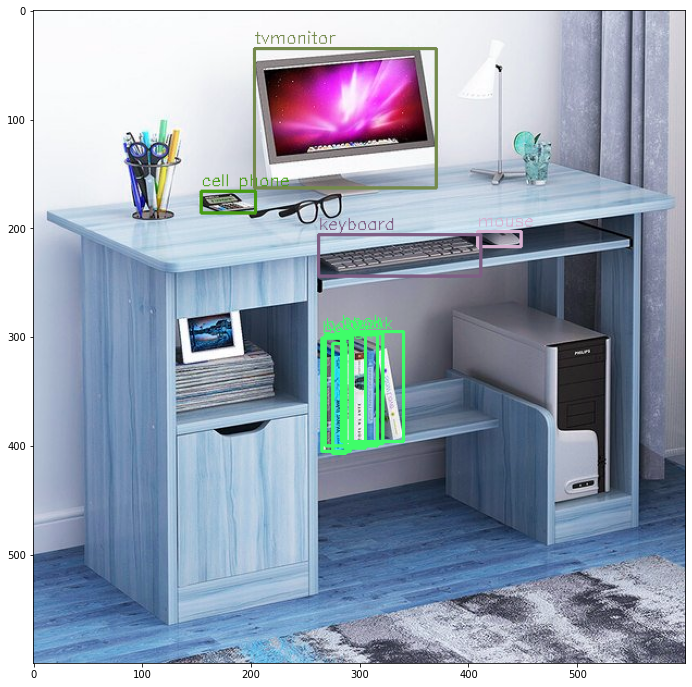

In [23]:
img = cv2.imread("test.jpg")
im = yolo_detect(img)
plt.figure(figsize=(12,12))
plt.imshow(im)
plt.show()

In [24]:
VIDEO_IN = cv2.VideoCapture(0)

while True:
    hasFrame, img = VIDEO_IN.read()
    img = cv2.resize(img, None, fx=1.4, fy=1.4)
    
    im = yolo_detect(img)
    
    cv2.imshow("Frame", im)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
VIDEO_IN.release()
cv2.destroyAllWindows()